## SVM

In [1]:
import numpy as np

In [40]:
label_a = np.random.normal(6, 2, size=(50, 2))

In [45]:
label_b = np.random.normal(-6, 2, size=(50, 2))

In [46]:
import matplotlib.pyplot as plt

In [47]:
a = [1, 2, 3]
b = [-1, -2, -3]

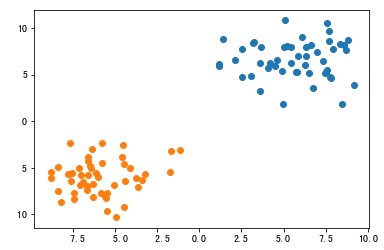

In [48]:
plt.scatter(*zip(*label_a))
plt.scatter(*zip(*label_b))

In [49]:
label_a_x = label_a[:, 0]
label_b_x = label_b[:, 0]

In [75]:
def f(x, k, b):
    return k * x - b

In [76]:
k_and_b = []
for i in range(100): 
    k, b = (np.random.random(size=(1, 2)) * 10 - 5)[0]

    if np.max(f(label_a_x, k, b)) <= -1 and np.min(f(label_b_x, k, b)) >= 1:
        print(k, b)
        k_and_b.append((k, b))

-3.377301158444684 -2.4870772233294725
-4.599979860562049 3.617895510827525
-3.4242172574346563 2.7340989314990383
-4.058472544189494 1.8478379010752652
-3.6426890591712224 2.3368275120877255
-3.3326382347923733 -2.260829645374167
-2.989835245034259 -2.3080907709054896
-1.9813663788735814 0.42678799362201847
-3.8212017179279134 -0.6234366414975092
-3.9089675505369703 -1.2425454927846182
-2.6909966173011544 0.3463069574787827
-3.114010990504683 -1.3913230434328403
-4.996917354325507 -2.9440420463663317
-3.723604245679687 1.2618829098427238
-3.277072246710758 0.12677633497239604
-4.3130388370861645 2.7810652609616406
-2.8221203073858825 0.29114108580525944
-4.499996012356222 -1.2283300492086466
-2.3396913663022256 1.2317968944330229
-4.1596839118129605 2.5117919530800803
-4.63388487901069 3.9787556298672158
-2.716378018299105 1.5132242910109825
-4.083505227298081 1.8707796338158467
-4.772024999957118 -0.977827462777614
-3.8955992981164744 2.7110346829472
-4.589900884226318 -1.71651588975

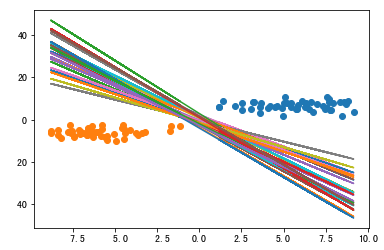

In [79]:
plt.scatter(*zip(*label_a))
plt.scatter(*zip(*label_b))

for k, b in k_and_b:
    x = np.concatenate((label_a_x, label_b_x))
    plt.plot(x, f(x, k, b))

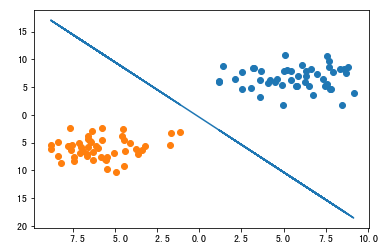

In [80]:
plt.scatter(*zip(*label_a))
plt.scatter(*zip(*label_b))

k, b = sorted(k_and_b, key=lambda t: abs(t[0]))[0]
x = np.concatenate((label_a_x, label_b_x))
plt.plot(x, f(x, k, b))

## If we define the labels with 1 and -1 

This can be written $ y_i (w * x_i - b) > 1 $ 

This margin of cloest points to this line is : $ \frac{2}{||w||}$ 

`Minimize ||w|| subject to $ y_i (w * x_i - b) > 1 $  for i == 1, ... , n `

We can use gradient descent to get the right $w$

But what's the loss function? 

### hinge loss

$$ loss = max(0, 1 - y_i(\vec{w^t} \vec{x_i} - b )) $$ 

$$ \frac{\partial{loss}}{\partial{w}} $$ 

### Add the regularization

$$ loss = max(0, 1 - y_i(\vec{w^t} \vec{x_i} - b )) + \lambda ||w||^2 $$

## Decision Tree

In [81]:
from sklearn.datasets import load_boston

In [82]:
boston = load_boston()

In [84]:
x, y = boston['data'], boston['target']

In [86]:
import pandas as pd

In [88]:
dataframe = pd.DataFrame(x)

In [93]:
dataframe.columns = boston['feature_names']

In [101]:
import random

In [108]:
def random_select(dataframe, drop_num=4): 
    columns = random.sample(list(dataframe.columns), k=len(dataframe.columns) - drop_num)
    
    return dataframe[columns]

In [122]:
from sklearn.model_selection import train_test_split

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
sample_x = random_select(dataframe)

In [116]:
regressioner = DecisionTreeRegressor()

In [125]:
(X_train, X_test, y_train, y_test) = train_test_split(sample_x, y, test_size=0.3)

In [126]:
regressioner.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [128]:
regressioner.score(X_train, y_train)

1.0

In [129]:
regressioner.score(X_test, y_test)

0.6357351374669445

In [169]:
def random_tree(train_x, train_y, test_x, test_y, drop_n=4):
    train_sample = random_select(train_x, drop_num=drop_n)

    regressioner = DecisionTreeRegressor()
    regressioner.fit(train_sample, train_y)
    
    train_score = regressioner.score(train_sample, train_y)
    test_score = regressioner.score(test_x[train_sample.columns], test_y)
    
    print('train score = {}; test score = {}'.format(train_score, test_score))
    
    y_predicat = regressioner.predict(test_x[train_sample.columns])
    
    return y_predicat

In [170]:
def random_forest(train_x, train_y, test_x, test_y, tree_n=4):
    predicat = np.array([random_tree(train_x, train_y, test_x, test_y) for _ in range(tree_n)])
    
    return np.mean(predicat, axis=0)

In [172]:
(X_train, X_test, y_train, y_test) = train_test_split(dataframe, y, test_size=0.3)

forest_predict = random_forest(X_train, y_train, X_test, y_test)

train score = 1.0; test score = 0.5329991826536034
train score = 1.0; test score = 0.6386830224458417
train score = 1.0; test score = 0.4411336028207918
train score = 1.0; test score = 0.6689986404332323


In [173]:
forest_predict

array([17.1  , 19.325, 26.   , 15.9  , 43.225, 21.025,  6.925, 31.75 ,
       15.35 , 20.6  , 16.025, 17.175, 28.5  , 18.225,  7.775, 14.625,
       22.225, 17.05 , 17.725, 17.3  , 31.875, 22.   , 18.675, 28.8  ,
       14.175, 15.35 , 31.475, 42.7  , 31.5  , 17.   , 16.325, 35.1  ,
       25.15 , 19.725, 44.35 , 19.925, 17.4  , 10.325, 28.15 , 20.775,
       18.3  , 17.5  , 23.525, 13.925, 11.5  , 43.2  , 17.325, 14.025,
       22.1  , 44.9  , 19.675, 49.7  , 35.15 , 22.35 , 15.45 , 31.6  ,
       32.3  , 19.45 , 26.8  , 31.85 , 24.9  , 16.5  , 31.075, 20.575,
       16.475, 19.075, 19.35 , 43.85 , 19.5  , 48.025, 19.525, 27.525,
       21.85 , 44.775, 14.9  , 43.325, 32.45 , 20.425, 26.125, 15.85 ,
       20.6  , 16.05 , 36.3  , 17.85 , 11.125, 18.125, 22.625, 25.175,
       34.125, 16.275, 16.575, 18.825, 36.475, 24.2  , 20.825, 18.8  ,
       15.25 , 20.125, 24.225, 40.5  , 29.625, 24.85 , 14.5  , 17.95 ,
       24.15 ,  9.525, 19.175, 22.05 , 19.   , 13.225, 22.35 , 12.3  ,
      

In [142]:
from sklearn.metrics import r2_score

## Ensemble Result is Better than Single Model

In [176]:
r2_score(y_test, forest_predict)

0.7535337805094233